In [12]:
"""Everything written in this notebook is by me, Student X, and was written for ECE 570
Every OTHER file in this zip is by epignatelli on GitHub"""


import jax
import jax.numpy as jnp
from lpg.agent import HParams, Lpg


# Calculate y_hat, the prediction update rule and pi, its resulting policy 
def run_lpg():
    # Create lpg instance through layers as described in paper
    hparams = HParams(hidden_size=32)
    meta = Lpg(hparams)

    # Randomize input parameters
    seed = 0
    m = 3   
    rng = jax.random.PRNGKey(seed)
    k1, k2 = jax.random.split(rng)
    x = (r, d, gamma, pi, y, y_t) = (
        jnp.array([1.0]),
        jnp.array([0.0]),
        jnp.array([0.95]),
        jnp.array([0.7]),
        jax.random.normal(k1, (m,)),
        jax.random.normal(k2, (m,)),
    )

    # Initialize pretrained model and apply the parameters
    output_shape, params = meta.init(rng, ((1,), (1,), (1,), (1,), (m,), (m,)))
    y_hat, pi = meta.apply(params, x)
    # Check that outputs are scalar
    float(y_hat)
    float(pi)
    print("y_hat:", y_hat, "pi", pi)


run_lpg()

y_hat: [0.02637188] pi [-0.02501712]


[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' ' ' '#' '#' '#' '#' '#' '#' '#' '#' '#' ' ' '#']
 ['#' ' ' '#' ' ' ' ' ' ' '#' ' ' ' ' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' 'a' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' ' ' 'P' '#' ' ' ' ' ' ' '#' ' ' ' ' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]
TimeStep(step_type=<StepType.FIRST: 0>, reward=None, discount=None, observation=array([146]))
TimeStep(step_type=<StepType.MID: 1>, reward=0.0, discount=1.0, observation=array([146]))
[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' ' ' ' ' ' '

AttributeError: 'GridworldConfig' object has no attribute 'chain_length_range'

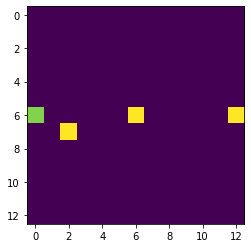

In [19]:
from lpg.environments.gridworld import TabularGridworld, RandomGridworld, GridMaps, GridworldConfig, GridworldObject
from lpg.environments.delayedchain import Delayedchain, DelayedchainMaps, DelayedchainConfig


# Experiment mentioned in the paper. Long winded, yet only route.
LABYRINTH_ONE_WAY = GridworldConfig(
    art=[
        "#############",
        "#     #     #",
        "# ######### #",
        "# #   #   # #",
        "# # # # # # #",
        "# # # # # # #",
        "# # # # # # #",
        "# # # # # # #",
        "# # # # # # #",
        "# # # # # # #",
        "# # # # # # #",
        "#   #   #   #",
        "#############",
    ],
    objects=tuple(
        map(
            lambda x: GridworldObject(*x),
            [
                (4, 1.0, 0.0, 0.005, "a"),
            ],
        )
    ),
    max_steps=2000,
)

# Classical Labyrinth config. Not mentioned in paper, only used in testing.
LABYRINTH = GridworldConfig(
    art=[
        "#############",
        "#     #     #",
        "### # # ### #",
        "# ##### # # #",
        "### # # #   #",
        "#   # # ### #",
        "# ###   ### #",
        "# #   # # # #",
        "# # # ###   #",
        "#### ## # # #",
        "# ## ##   # #",
        "#    ##  ## #",
        "#############",
    ],
    objects=tuple(
        map(
            lambda x: GridworldObject(*x),
            [
                (4, 1.0, 0.0, 0.005, "a"),
            ],
        )
    ),
    max_steps=2000,
)

# Simple delayed chain/umbrella configs. Don't really produce vastly different results from
# the standard SHORT AND LONG configurations 
VERY_SHORT_AND_NOISY = DelayedchainConfig((5, 15), True)
VERY_LONG_AND_NOISY = DelayedchainConfig((5, 100), True)


step_direction = 1  # Value from 0-8, corresponding to all movement possibillities
                    # as defined in gridworld.Actions

# Create tabular world out of config and render it
def make_tabular_gridworld(grid_config: GridworldConfig):
    env = TabularGridworld(grid_config, False)
    env.render()
    print(env.reset())
    print(env.step(step_direction))
    env.render()


# Create random world out of config and render it
def make_random_gridworld(grid_config: GridworldConfig):
    env = RandomGridworld(grid_config, False)
    env.render()
    print(env.reset())
    print(env.step(step_direction))
    env.render()

# This makes a simple delay chain/umbrella model.
# No pretty visualizations for this one though.
    env = Delayedchain(grid_config)
    env.render()
    print(env.reset())
    print(env.step(step_direction))
    env.render()

# To try running the included configurations, use 
# GridMaps.xxxxxx for GridWorlds
# or
# DelayedchainMaps.xxxxx for delayed chain environments 

# Run selected configurations
make_tabular_gridworld(LABYRINTH_ONE_WAY)
make_random_gridworld(LABYRINTH_ONE_WAY)
Delayedchain(VERY_SHORT_AND_NOISY)

In [5]:
"""These are just simple tests to check the cell sizes"""

import jax
import jax.numpy as jnp
from lpg.modules import LSTM, LSTMCell, LSTMState, Rnn


def test_lstm_cell():
    rng = jax.random.PRNGKey(0)
    input_shape = (8,)
    lstm = LSTMCell(16)
    x = jax.random.normal(rng, input_shape)
    out_shape, params = lstm.init(rng, input_shape)
    outputs, state = lstm.apply(params, x)
    print(outputs.shape, state.h.shape, state.c.shape)
    jax.jit(lstm.apply)(params, x)
    jax.grad(lambda l: sum(lstm.apply(params, x)[0]))(1.0)


def test_lstm():
    rng = jax.random.PRNGKey(0)
    SEQ_LEN = 5
    INPUT_FEATURES = 8
    HIDDEN_SIZE = 16
    input_shape = (SEQ_LEN, INPUT_FEATURES)
    lstm = LSTM(HIDDEN_SIZE)
    x = jax.random.normal(rng, input_shape)
    out_shape, params = lstm.init(rng, input_shape)
    outputs, hidden_state = lstm.apply(params, x)
    print(outputs.shape)
    jax.jit(lstm.apply)(params, x)
    jax.grad(lambda l: sum(sum(lstm.apply(params, x)[0])))(1.0)


def test_gru_cell():
    rng = jax.random.PRNGKey(0)
    input_shape = (8,)
    gru = LSTMCell(16)
    x = jax.random.normal(rng, input_shape)
    out_shape, params = gru.init(rng, input_shape)
    outputs, state = gru.apply(params, x)
    print(outputs.shape, state.h.shape, state.c.shape)
    jax.jit(gru.apply)(params, x)
    jax.grad(lambda l: sum(gru.apply(params, x)[0]))(1.0)


def test_gru():
    rng = jax.random.PRNGKey(0)
    SEQ_LEN = 5
    INPUT_FEATURES = 8
    HIDDEN_SIZE = 16
    input_shape = (SEQ_LEN, INPUT_FEATURES)
    gru = LSTM(HIDDEN_SIZE)
    x = jax.random.normal(rng, input_shape)
    out_shape, params = gru.init(rng, input_shape)
    outputs, hidden_state = gru.apply(params, x)
    print(outputs.shape)
    jax.jit(gru.apply)(params, x)
    jax.grad(lambda l: sum(sum(gru.apply(params, x)[0])))(1.0)



test_lstm_cell()
test_lstm()
test_gru_cell()
test_gru()

(16,) (16,) (16,)
(5, 16)
(16,) (16,) (16,)
(5, 16)
